## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
single_dataset= pd.merge(study_results,mouse_metadata, on="Mouse ID", how ="left")

In [2]:
# Checking the number of mice in the DataFrame.
total_mouse=single_dataset["Mouse ID"].nunique()
print(f"There are {total_mouse} mices in the DataFrame")


There are 249 mices in the DataFrame


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = single_dataset.loc[single_dataset.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(f"The Duplicated Mice is {duplicate_mice} ")




The Duplicated Mice is ['g989'] 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice=single_dataset.loc[single_dataset["Mouse ID"]=="g989"]
duplicated_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset=single_dataset.loc[single_dataset["Mouse ID"]!="g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
tot_mouse_clean=clean_dataset["Mouse ID"].nunique()

print(f"There are {tot_mouse_clean} mices in the clean DataFrame")


There are 248 mices in the clean DataFrame


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stand_dev= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem= clean_dataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics_df=pd.DataFrame({"Mean": mean,"Median":median,"Variance":variance,"Standard Deviation":stand_dev,"SEM":sem})


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

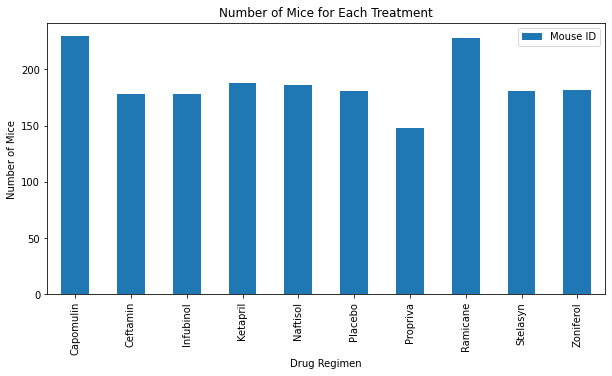

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
Drug_regimen_df=pd.DataFrame(clean_dataset.groupby(["Drug Regimen"])["Mouse ID"].count())
Drug_regimen_df.plot(kind="bar",figsize= (10,5))
plt.title("Number of Mice for Each Treatment")
plt.ylabel("Number of Mice")
plt.show()



In [13]:
Drug_regimen_df=Drug_regimen_df.reset_index()

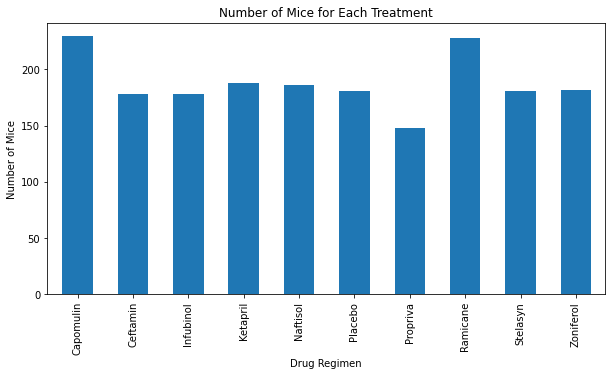

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis=np.arange(len(Drug_regimen_df))

yaxis=Drug_regimen_df["Drug Regimen"].tolist()
regimen_count=(clean_dataset.groupby(["Drug Regimen"])["Age_months"].count())
plt.figure(figsize=(10,5))
plt.bar(x_axis,regimen_count, width=.55)
plt.xticks(x_axis,yaxis, rotation="vertical" )
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlim(-0.55,len(x_axis)-0.47)
plt.show()

## Pie Plots

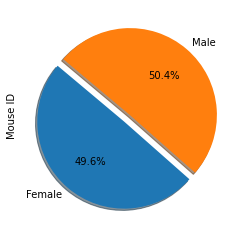

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist_df=clean_dataset.drop_duplicates(subset=["Mouse ID"])
explode = (0.1, 0)
gender_dist_df=gender_dist_df.groupby(["Sex"]).count()
gender=gender_dist_df["Mouse ID"]
pie_plot_pandas=gender.plot.pie(subplots=True,explode=explode,shadow=True,startangle=140,autopct='%1.1f%%',figsize=(4, 4))



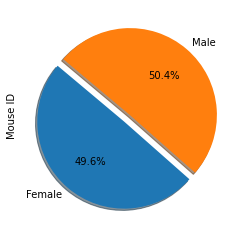

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels="Female","Male"
plt.pie(gender,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)
plt.ylabel("Mouse ID")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the and quantitatively determine if there are any potential outliers. 

groupby and .max()


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_scatter_df=clean_dataset.loc[single_dataset["Drug Regimen"]=="Capomulin"]
time_line=line_scatter_df["Timepoint"]
tumor_vol=line_scatter_df["Tumor Volume (mm3)"]

plt.plot(time_line,tumor_vol)
plt.show

#time on x
#tumor volume on y

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

average weught with group by

mouse weight is x
tumor volume is y

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse weight is x
tumor volume is y